In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence #unique id

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout, Embedding

import warnings
warnings.filterwarnings("ignore")

nltk.download('omw-1.4')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [5]:
df = pd.read_csv("cleaned_reviews.csv")
df.head()

,sentiments,cleaned_review,cleaned_review_length,review_score
0,positive,i wish would have gotten one earlier love it a...,19.0,5.0
1,neutral,i ve learned this lesson again open the packag...,88.0,1.0
2,neutral,it is so slow and lags find better option,9.0,2.0
3,neutral,roller ball stopped working within months of m...,12.0,1.0
4,neutral,i like the color and size but it few days out ...,21.0,1.0


In [7]:
df.shape

(5843, 4)

In [8]:
df.columns

Index(['sentiments', 'cleaned_review', 'cleaned_review_length',
       'review_score'],
      dtype='object')

In [9]:
df.drop(columns=['cleaned_review_length','review_score'],inplace=True)


In [10]:
df.shape

(5843, 2)

In [11]:
df.isna().sum()


sentiments        0
cleaned_review    1
dtype: int64

In [12]:
df.dropna(inplace=True)


In [13]:
df.shape

(5842, 2)

In [18]:
df["sentiments"].replace({"negative":0,"neutral":1,"positive":2}, inplace=True)

In [19]:
df.sentiments.value_counts()

1    2608
2    2526
0     708
Name: sentiments, dtype: int64

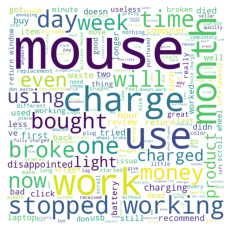

In [40]:
wc = WordCloud(width=800, height=800,
               background_color="white",
               min_font_size=10)

wc.generate(" ".join(df[df["sentiments"]==0]["cleaned_review"]))
plt.imshow(wc)
plt.axis("off")
plt.show()

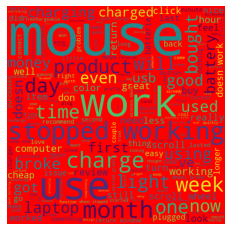

In [45]:
wc = WordCloud(width=800, height=800,
               background_color="red",
               min_font_size=10)

wc.generate(" ".join(df[df["sentiments"]==1]["cleaned_review"]))
plt.imshow(wc)
plt.axis("off")
plt.show()

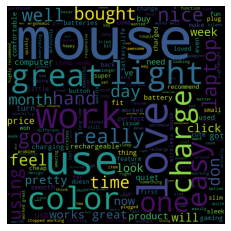

In [44]:
wc = WordCloud(width=800, height=800,
               background_color="black",
               min_font_size=10)

wc.generate(" ".join(df[df["sentiments"]==2]["cleaned_review"]))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [14]:
def cleantext(text):
  tokens = word_tokenize(text.lower())
  ftoken = [t for t in tokens if(t.isalpha())]
  stop = stopwords.words("english")
  ctoken = [t for t in ftoken if(t not in stop)]
  lemma = WordNetLemmatizer()
  ltoken = [lemma.lemmatize(t) for t in ctoken]
  return " ".join(ltoken)

In [20]:
df["cleaned_review"].apply(cleantext)

0       wish would gotten one earlier love make workin...
1       learned lesson open package use product right ...
2                             slow lag find better option
3       roller ball stopped working within month minim...
4           like color size day return period hold charge
                              ...                        
5838    love rose gold color cute lightweight love lig...
5839    recently got job working home needed mouse acc...
5840         quiet cute love color battery last long time
5841    bought twice matched keyboard time broke withi...
5842                                                    l
Name: cleaned_review, Length: 5842, dtype: object

In [21]:
x = df["cleaned_review"]
y = df["sentiments"]

In [22]:
x

0       i wish would have gotten one earlier love it a...
1       i ve learned this lesson again open the packag...
2               it is so slow and lags find better option
3       roller ball stopped working within months of m...
4       i like the color and size but it few days out ...
                              ...                        
5838    love it the rose gold color is so cute and it ...
5839    i recently got job working from home and neede...
5840    it quiet and cute love all the colors and the ...
5841    bought this twice because it matched my keyboa...
5842                                                    l
Name: cleaned_review, Length: 5842, dtype: object

In [23]:
y

0       2
1       1
2       1
3       1
4       1
       ..
5838    2
5839    2
5840    2
5841    1
5842    2
Name: sentiments, Length: 5842, dtype: int64

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1)

In [26]:
sentlen = []

for sent in df["cleaned_review"]:
  sentlen.append(len(word_tokenize(sent)))

df["SentLen"] = sentlen 
df.head()

,sentiments,cleaned_review,SentLen
0,2,i wish would have gotten one earlier love it a...,19
1,1,i ve learned this lesson again open the packag...,88
2,1,it is so slow and lags find better option,9
3,1,roller ball stopped working within months of m...,12
4,1,i like the color and size but it few days out ...,21


In [27]:
max(sentlen)

360

In [28]:
max_len = np.quantile(sentlen, 0.95)

In [29]:
max_len

84.0

In [30]:
tok = Tokenizer(char_level=False, split=" ")
tok.fit_on_texts(xtrain)
tok.index_word

{1: 'it',
 2: 'the',
 3: 'and',
 4: 'to',
 5: 'mouse',
 6: 'this',
 7: 'for',
 8: 'is',
 9: 'my',
 10: 'not',
 11: 'of',
 12: 'on',
 13: 'but',
 14: 'in',
 15: 'that',
 16: 'use',
 17: 'was',
 18: 'i',
 19: 'so',
 20: 'with',
 21: 'work',
 22: 'have',
 23: 'very',
 24: 'you',
 25: 'charge',
 26: 'working',
 27: 'great',
 28: 'after',
 29: 'one',
 30: 'just',
 31: 'love',
 32: 'like',
 33: 'works',
 34: 'when',
 35: 'stopped',
 36: 'as',
 37: 'only',
 38: 'no',
 39: 'at',
 40: 'would',
 41: 'had',
 42: 'good',
 43: 'up',
 44: 'if',
 45: 'lights',
 46: 'time',
 47: 'be',
 48: 'battery',
 49: 'all',
 50: 'worked',
 51: 'bought',
 52: 'months',
 53: 'well',
 54: 'or',
 55: 'usb',
 56: 'product',
 57: 'doesn',
 58: 'laptop',
 59: 'now',
 60: 'using',
 61: 'will',
 62: 'off',
 63: 'can',
 64: 'about',
 65: 'don',
 66: 'has',
 67: 'really',
 68: 'light',
 69: 'me',
 70: 'easy',
 71: 'are',
 72: 'wheel',
 73: 'broke',
 74: 'then',
 75: 'nice',
 76: 'charging',
 77: 'first',
 78: 'get',
 79: 'e

In [31]:
vocab_len = len(tok.index_word)
vocab_len

4250

In [32]:
seqtrain = tok.texts_to_sequences(xtrain) #step1
seqtrain

[[462, 44, 24, 32, 564, 5, 132, 45, 36, 53],
 [82, 1, 406, 108, 1, 297, 93],
 [1697, 108, 434, 51, 109],
 [6,
  111,
  5,
  8,
  23,
  68,
  3,
  591,
  1,
  63,
  47,
  85,
  7,
  83,
  46,
  28,
  76,
  118,
  572,
  2,
  1698,
  39,
  49,
  30,
  178,
  2,
  399,
  116,
  8,
  2764,
  39,
  2,
  384,
  11,
  350,
  133,
  2,
  55,
  224,
  11,
  2,
  2765,
  658,
  3,
  1,
  1145,
  4,
  21,
  875,
  1,
  305,
  70,
  3,
  390,
  4,
  78,
  592],
 [18, 32, 1, 230, 75, 3, 70, 4, 16, 1],
 [1362,
  60,
  12,
  644,
  3,
  34,
  259,
  114,
  4,
  9,
  450,
  619,
  1,
  41,
  240,
  35,
  26,
  63,
  10,
  25,
  1,
  139,
  12,
  380,
  645,
  3,
  2,
  645,
  125,
  2026,
  1,
  44,
  1,
  10,
  178,
  14,
  985,
  116,
  1146,
  2,
  620,
  11,
  2,
  111,
  1498,
  5,
  65,
  81,
  44,
  24,
  71,
  201,
  7,
  83,
  831,
  400,
  3,
  63,
  331,
  186,
  4,
  766,
  2,
  435,
  2,
  37,
  400,
  375,
  876,
  69,
  8,
  4,
  463,
  226,
  63,
  10,
  766,
  2,
  344],
 [18,
  41,
 

In [33]:
seqmattrain = sequence.pad_sequences(seqtrain, maxlen= int(max_len)) #step2
seqmattrain

array([[   0,    0,    0, ...,   45,   36,   53],
       [   0,    0,    0, ...,    1,  297,   93],
       [   0,    0,    0, ...,  434,   51,  109],
       ...,
       [   0,    0,    0, ...,   36,    1,  297],
       [   0,    0,    0, ...,   16,    3, 2694],
       [   0,    0,    0, ...,   52,   11,   60]], dtype=int32)

In [34]:
seqtest = tok.texts_to_sequences(xtest)
seqmattest = sequence.pad_sequences(seqtest, maxlen=int(max_len))

In [35]:
vocab_len

4250

In [36]:
rnn = Sequential()

rnn.add(Embedding(vocab_len+1,700, input_length=int(max_len), mask_zero=True))
rnn.add(SimpleRNN(units=32, activation="tanh"))
rnn.add(Dense(units=32, activation="relu"))
rnn.add(Dropout(0.2))

rnn.add(Dense(units=1, activation="sigmoid"))

rnn.compile(optimizer="adam", loss="binary_crossentropy")

rnn.fit(seqmattrain, ytrain, batch_size=50, epochs=50)

ypred = rnn.predict(seqmattest)

ypred = ypred>0.5

Epoch 1/50
82/82 [==============================] - 9s 84ms/step - loss: -1.9078
Epoch 2/50
82/82 [==============================] - 7s 83ms/step - loss: -9.4601
Epoch 3/50
82/82 [==============================] - 8s 92ms/step - loss: -22.6986
Epoch 4/50
82/82 [==============================] - 7s 82ms/step - loss: -44.3169
Epoch 5/50
82/82 [==============================] - 7s 83ms/step - loss: -73.6050
Epoch 6/50
82/82 [==============================] - 7s 82ms/step - loss: -107.7365
Epoch 7/50
82/82 [==============================] - 7s 82ms/step - loss: -150.8671
Epoch 8/50
82/82 [==============================] - 8s 101ms/step - loss: -198.1293
Epoch 9/50
82/82 [==============================] - 7s 83ms/step - loss: -249.6903
Epoch 10/50
82/82 [==============================] - 7s 82ms/step - loss: -312.7874
Epoch 11/50
82/82 [==============================] - 8s 103ms/step - loss: -384.3278
Epoch 12/50
82/82 [==============================] - 7s 82ms/step - loss: -461.2418
Epoch 

In [37]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.44      0.06      0.11       220
           1       0.44      0.98      0.60       763
           2       0.00      0.00      0.00       770

    accuracy                           0.44      1753
   macro avg       0.29      0.35      0.24      1753
weighted avg       0.24      0.44      0.28      1753



In [38]:
rnn = Sequential()

rnn.add(Embedding(vocab_len+1,700, input_length=int(max_len), mask_zero=True))

rnn.add(LSTM(units=32, activation="tanh"))
rnn.add(Dense(units=32, activation="relu"))
rnn.add(Dropout(0.2))


rnn.add(Dense(units=1, activation="sigmoid"))

rnn.compile(optimizer="adam", loss="binary_crossentropy")

rnn.fit(seqmattrain, ytrain, batch_size=50, epochs=50)

ypred = rnn.predict(seqmattest)

ypred = ypred>0.5

Epoch 1/50
82/82 [==============================] - 17s 159ms/step - loss: -2.4340
Epoch 2/50
82/82 [==============================] - 13s 158ms/step - loss: -11.1858
Epoch 3/50
82/82 [==============================] - 13s 158ms/step - loss: -26.8341
Epoch 4/50
82/82 [==============================] - 13s 159ms/step - loss: -52.5085
Epoch 5/50
82/82 [==============================] - 13s 159ms/step - loss: -86.6508
Epoch 6/50
82/82 [==============================] - 13s 160ms/step - loss: -126.9764
Epoch 7/50
82/82 [==============================] - 13s 161ms/step - loss: -174.1241
Epoch 8/50
82/82 [==============================] - 13s 162ms/step - loss: -229.9377
Epoch 9/50
82/82 [==============================] - 13s 163ms/step - loss: -293.1984
Epoch 10/50
82/82 [==============================] - 13s 164ms/step - loss: -364.5484
Epoch 11/50
82/82 [==============================] - 13s 161ms/step - loss: -436.1463
Epoch 12/50
82/82 [==============================] - 13s 161ms/step -

In [39]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.53      0.34      0.41       220
           1       0.43      0.92      0.59       763
           2       0.00      0.00      0.00       770

    accuracy                           0.44      1753
   macro avg       0.32      0.42      0.33      1753
weighted avg       0.26      0.44      0.31      1753

